# Erste Analyse

In [1]:
# imports
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir('../../..')

In [3]:
# Important! Set project root as current working directory
from src.utils import get_project_root


root = get_project_root()
os.chdir(root)

In [4]:
# get file_id to read dataset
json_file_path = 'credentials/file_ids.json'

with open(json_file_path, 'r') as j:
     file_id_bl = json.loads(j.read())['baseline']

with open(json_file_path, 'r') as j:
     file_id_fu = json.loads(j.read())['follow_up']

In [5]:
# read file
# Windows
#dwn_url='https://drive.google.com/uc?id='
#bl = pd.read_csv(dwn_url + file_id_bl, parse_dates=['created_at'], index_col='answer_id')
#fu = pd.read_csv(dwn_url + file_id_fu, parse_dates=['created_at'], index_col='answer_id')

# Mac
bl = pd.read_csv('data/d01_raw/rki_heart_baseline.csv', parse_dates=['created_at'], index_col='answer_id')
fu = pd.read_csv('data/d01_raw/rki_heart_followup.csv', parse_dates=['created_at'], index_col='answer_id')

## Get some baseline facts

In [6]:
# n participants
bl.user_id.nunique()

1805

In [7]:
# n follow-up assessments
fu.shape[0]

5895

## How many follow-up assessments over the time?

In [8]:
print('Number of monthly active users in baseline')
bl['YYYY-MM'] = bl.created_at.dt.strftime('%Y-%m')
bl.groupby('YYYY-MM').nunique()['user_id']

Number of monthly active users in baseline


YYYY-MM
2020-07     89
2020-08    566
2020-09     74
2020-10    204
2020-11    132
2020-12    137
2021-01     88
2021-02     41
2021-03     79
2021-04     57
2021-05     45
2021-06     34
2021-07     18
2021-08      7
2021-09      7
2021-10     64
2021-11     39
2021-12     22
2022-01     24
2022-02     17
2022-03      4
2022-04      2
2022-05     11
2022-06      7
2022-07      5
2022-08      4
2022-09      3
2022-10      9
2022-11      4
2023-01      2
2023-02      2
2023-03      1
2023-04      1
2023-05      2
2023-08      2
2023-09      2
Name: user_id, dtype: int64

In [9]:
print('n assessments per month in follow up')
fu['YYYY-MM'] = fu.created_at.dt.strftime('%Y-%m')
fu['YYYY-MM'].value_counts().sort_index()

n assessments per month in follow up


YYYY-MM
2020-07      1
2020-08    397
2020-09    427
2020-10    395
2020-11    438
2020-12    445
2021-01    409
2021-02    348
2021-03    347
2021-04    309
2021-05    297
2021-06    209
2021-07    156
2021-08    139
2021-09    108
2021-10    129
2021-11    171
2021-12    134
2022-01    141
2022-02     68
2022-03    102
2022-04     56
2022-05    150
2022-06     85
2022-07     64
2022-08     79
2022-09     58
2022-10     48
2022-11     35
2022-12     27
2023-01     28
2023-02     21
2023-03     19
2023-04     19
2023-05     12
2023-06      6
2023-07      6
2023-08      6
2023-09      2
2023-10      4
Name: count, dtype: int64

In [10]:
print('Number of monthly active users in follow up')
fu.groupby('YYYY-MM').nunique()['user_id']

Number of monthly active users in follow up


YYYY-MM
2020-07      1
2020-08    308
2020-09    257
2020-10    249
2020-11    255
2020-12    232
2021-01    236
2021-02    199
2021-03    186
2021-04    174
2021-05    161
2021-06    127
2021-07     93
2021-08     70
2021-09     64
2021-10     80
2021-11     87
2021-12     76
2022-01     77
2022-02     56
2022-03     45
2022-04     28
2022-05     42
2022-06     46
2022-07     37
2022-08     39
2022-09     36
2022-10     28
2022-11     24
2022-12     17
2023-01     17
2023-02     13
2023-03     12
2023-04     14
2023-05      8
2023-06      4
2023-07      4
2023-08      3
2023-09      2
2023-10      2
Name: user_id, dtype: int64

## Welche Domänen (alle im Fragebogen) wurden über die Zeit wie häufig befüllt und ausgefüllt im Zeitverlauf

**Zwischen den Domänen sind keine großen Unterschiede im Zeitverlauf. Wenn es in einem Monat viele aktive Nutzer gab, dann auch in den jeweiligen Domänen. Die unten stehende Tabelle gibt die Anzahl der vorhandenen Werte in diesem Jahr und Monat (YYYY-MM) für alle Variablen an.**

In [11]:
bl['YYYY-MM'] = bl.created_at.dt.strftime('%Y-%m')
res = bl.groupby('YYYY-MM').apply(lambda x: x.notnull().sum())
# res.to_excel('results/first_glance/non_null_count_per_month_and_variable.xlsx')
res

,questionnaire_id,user_id,created_at,sensordata_apps,sensordata_beginTime,sensordata_collected_at,sensordata_endTime,sensordata_name,sensordata_sleepTimes,sensordata_top5Apps,...,pain1,pain2,name,device,os,sensordata,sensordata_altitude,sensordata_latitude,sensordata_longitude,YYYY-MM
YYYY-MM,,,,,,,,,,,,,,,,,,,,,
2020-07,89,89,89,9,9,68,9,68,9,9,...,89,89,89,89,89,0,59,59,59,89
2020-08,566,566,566,12,12,485,12,485,12,12,...,566,566,566,566,566,0,473,473,473,566
2020-09,74,74,74,3,3,62,3,62,3,3,...,74,74,74,74,74,0,59,59,59,74
2020-10,204,204,204,12,12,163,12,163,12,12,...,204,204,204,204,204,0,151,151,151,204
2020-11,132,132,132,6,6,107,6,107,6,6,...,132,132,132,132,132,0,101,101,101,132
2020-12,137,137,137,11,11,114,11,114,11,11,...,137,137,137,137,137,0,103,103,103,137
2021-01,88,88,88,5,5,74,5,74,5,5,...,88,88,88,88,88,0,69,69,69,88
2021-02,41,41,41,3,3,26,3,26,3,3,...,41,41,41,41,41,0,23,23,23,41
2021-03,79,79,79,5,5,60,5,60,5,5,...,79,79,79,79,79,0,55,55,55,79


## Height distribution

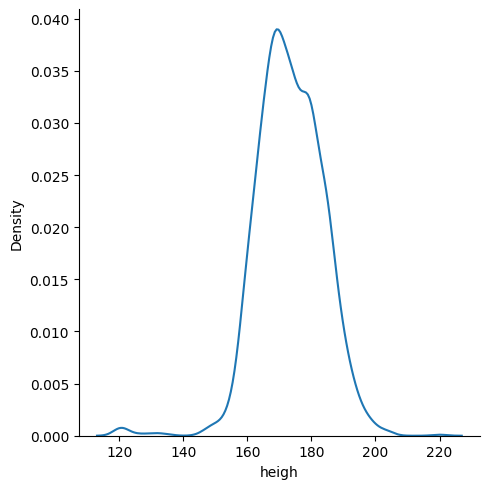

,count,mean,min,25%,50%,75%,max,std
geschlecht,,,,,,,,
0.0,431.0,167.765661,149.0,163.0,168.0,172.0,220.0,6.876541
1.0,244.0,179.061475,120.0,174.0,179.5,185.0,204.0,9.006189
2.0,3.0,160.000000,120.0,145.0,170.0,180.0,190.0,36.055513


In [12]:
sns.displot(data=bl, x="heigh", kind="kde")
plt.show()

bl.groupby('geschlecht').describe()['heigh']

## Weight distribution

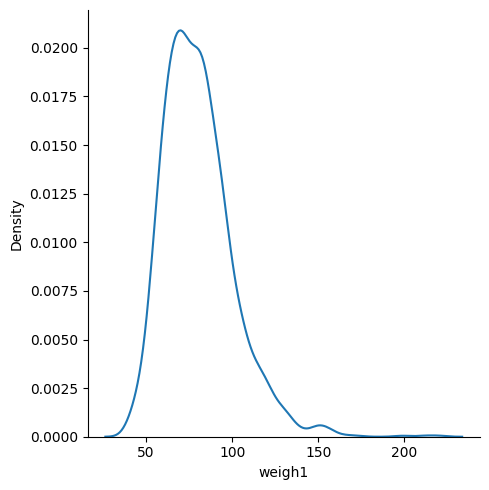

,count,mean,min,25%,50%,75%,max,std
geschlecht,,,,,,,,
0.0,429.0,73.125874,40.0,61.0,68.0,82.0,172.0,18.461959
1.0,244.0,89.229508,50.0,75.0,87.0,98.0,154.0,18.174412
2.0,3.0,91.333333,42.0,54.5,67.0,116.0,165.0,65.010256


In [13]:
sns.displot(data=bl, x="weigh1", kind="kde")
plt.show()

bl.groupby('geschlecht').describe()['weigh1']

## Sensor and app data

In [14]:
print('n Geographical data in baseline:\t', bl.sensordata_altitude.notnull().sum())
print()
print('tracking permission ratio:', bl.sensordata_altitude.notnull().sum()/bl.shape[0])
print('------------------------------------------------')
print('n Geographical data in followup:\t', fu.sensordata_altitude.notnull().sum())
print()
print('tracking permission ratio: \t', fu.sensordata_altitude.notnull().sum()/fu.shape[0])

n Geographical data in baseline:	 1366

tracking permission ratio: 0.756786703601108
------------------------------------------------
n Geographical data in followup:	 4673

tracking permission ratio: 	 0.7927056827820187


In [15]:
print('n permissions apps tracking in baseline:\t', bl.sensordata_apps.notnull().sum())
print()
print('tracking permission ratio', bl.sensordata_apps.notnull().sum()/bl.shape[0])
print('------------------------------------------------')
print('n permissions apps tracking in followup:\t', fu.sensordata_apps.notnull().sum())
print()
print('tracking permission ratio: \t', fu.sensordata_apps.notnull().sum()/fu.shape[0])

n permissions apps tracking in baseline:	 101

tracking permission ratio 0.05595567867036011
------------------------------------------------
n permissions apps tracking in followup:	 370

tracking permission ratio: 	 0.06276505513146735


## Hypertension, Diabetes, Blood Pressure
*<font color='red'>
Bei Hypertension, Diabetes und Blood Pressure interessiert uns, wie viele Patienten hiervon betroffen sind, nicht nur, wie viele diese Frage insgesamt ausgefüllt haben. 
Demnach bräuchten wir die Anzahl N für Patienten mit:
hyper1 == 1
diabe1 == 1
blood1 == 1
Kannst du diese Abfrage noch machen?
<font>*

### Hypertension

In [16]:
print('Absolut numbers\n', bl.hyper1.value_counts())
pd.DataFrame()

print('Relative numbers\n', bl.hyper1.value_counts(normalize=True))


Absolut numbers
 hyper1
0     1117
1      454
99     234
Name: count, dtype: int64
Relative numbers
 hyper1
0     0.618837
1     0.251524
99    0.129640
Name: proportion, dtype: float64


### Diabetes

In [17]:
print('Absolut numbers\n', bl.diabe1.value_counts())
pd.DataFrame()

print('Relative numbers\n', bl.diabe1.value_counts(normalize=True))

Absolut numbers
 diabe1
0     1453
99     239
1      113
Name: count, dtype: int64
Relative numbers
 diabe1
0     0.804986
99    0.132410
1     0.062604
Name: proportion, dtype: float64


### Bloodpressure

In [18]:
print('Absolut numbers\n', bl.hyper1.value_counts())
pd.DataFrame()

print('Relative numbers\n', bl.hyper1.value_counts(normalize=True))

Absolut numbers
 hyper1
0     1117
1      454
99     234
Name: count, dtype: int64
Relative numbers
 hyper1
0     0.618837
1     0.251524
99    0.129640
Name: proportion, dtype: float64


## BMI
*<font color='red'>BMI haben wir von: 429 + 244 = 673
D.h. diese Anzahl an Personen hat sowohl Height als auch Weight angegeben? Aktuell ist das als zwei Grafen dargestellt, wichtig wäre zu wissen, wer beide Angaben abgegeben hat.<font>*

In [19]:
bl.dropna(subset=['weigh1','heigh'], how='any')[['weigh1','heigh']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1772 entries, 30879 to 30576
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weigh1  1772 non-null   float64
 1   heigh   1772 non-null   float64
dtypes: float64(2)
memory usage: 41.5 KB


**1772 Personen haben sowohl Gewicht als auch Körpergröße angegeben**

In [20]:
def calculate_bmi(weight_kg, height_cm):
    bmi = weight_kg / ((height_cm/100) ** 2)
    return bmi

bl['bmi'] = bl.apply(lambda row: calculate_bmi(row['weigh1'], row['heigh']), axis=1)

bl.bmi.describe()


count    1772.000000
mean       26.658209
std         6.232164
min         8.264463
25%        22.515191
50%        25.432398
75%        29.377583
max        80.808081
Name: bmi, dtype: float64

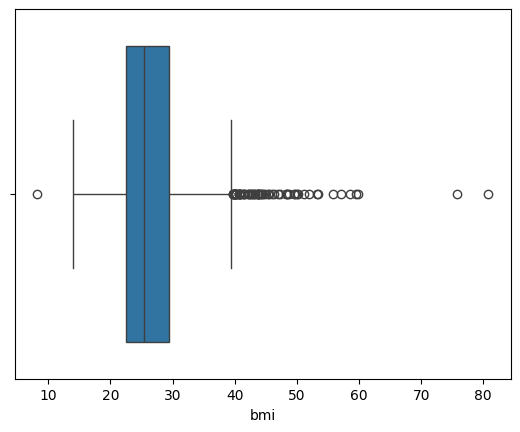

In [21]:
sns.boxplot(data=bl, x="bmi")
plt.show()


*<font color='red'>Und auf welche Grundgesamtheit, also Anzahl Personen im Datensatz, bezieht sich das insgesamt? 
Und wenn ich es richtig sehe, haben wir die Angabe egtl. von mehr Personen, aber da Geschlecht bis Dez 2020 fehlt, kann ich die Verteilung hier nicht zuordnen, korrekt? Die Werte sind ja nur aussagekräftig, wenn ich die Geschlechtsangaben habe.</font>*

Ich weiß nicht ganz, was Du meinst, aber ich hoffe, dasss die obigen Zahlen die Antwort liefen. Zu 1772 haben wir Gewicht und Körpergröße, zu 684 Personen haben wir Age, Sex, und Country.

## Age, Sex, Country
*<font color='red'>
Die Angaben für Alter, Geschlecht und Land haben wir erst ab 12-2020. Das sollten wir auf jeden Fall jetzt in alle weiteren Diskussionen miteinbeziehen. Entweder man fokussiert sich auf ein Thema, wo diese Faktoren eine untergeordnete Rolle spielen, oder man kann erst die Daten ab Dez 2020 verwenden. Wie viele Patienten haben wir denn für den Baselinebogen, wenn wir erst ab Dez 2020 rechnen?
<font>*

Korrekt, ja. Von den 1805 Nutzern haben 1121 keine Alters-, Geschlecht- oder Länderangabe.
Alter, Geschlecht und Land ist bekannt von 684 Personen. 

In [22]:
bl[['created_at', 'alter']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1805 entries, 30879 to 30576
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  1805 non-null   datetime64[ns]
 1   alter       684 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 106.8 KB


In [23]:
!jupyter nbconvert --to html --no-input src/d01_analyse/RQ1/Analyse.ipynb
!jupyter nbconvert --to pdf --no-input src/d01_analyse/RQ1/Analyse.ipynb

[NbConvertApp] Converting notebook src/d01_analyse/RQ1/Analyse.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 384061 bytes to src/d01_analyse/RQ1/Analyse.html
[NbConvertApp] Converting notebook src/d01_analyse/RQ1/Analyse.ipynb to pdf
[NbConvertApp] Support files will be in Analyse_files/
[NbConvertApp] Making directory ./Analyse_files
[NbConvertApp] Writing 43934 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 113307 bytes to src/d01_analyse/RQ1/Analyse.pdf
